# **Employee Performance Analysis**


---



This project analyzes employee data to uncover key insights on **workforce distribution, performance, job satisfaction, remote work trends, overtime, salary impact, and promotions**.  

Using **interactive visualizations**, we identify patterns in **employee behavior, gender diversity, work preferences, and performance trends**. These insights help **HR, managers, and business leaders** enhance **employee satisfaction, optimize policies, and improve workforce efficiency**.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path="/content/drive/My Drive/Colab Notebooks/Employees.xlsx"
df=pd.read_excel(file_path)

# **DATA CLEANING & UNDERSTANDING**
---



In [ ]:
df.shape

(697, 18)

In [ ]:
df.head(10)

,Emp_Id,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours,Performance,Promotion,Remote_Work_Frequency
0,1.0,Ghadir,Hmshw,Male,2018-04-04,6,Quality Control,Egypt,West,6750.0,18720.0,3.0,1.0,0.0,183.0,5.0,4.0,0.0
1,2.0,Omar,Hishan,Male,2020-05-21,4,Quality Control,Saudi Arabia,West,7500.0,38964.0,1.0,0.0,5.0,198.0,5.0,2.0,100.0
2,3.0,Ailya,Sharaf,Female,2017-09-28,7,Major Mfg Projects,Saudi Arabia,West,5850.0,30072.0,2.0,0.0,3.0,192.0,3.0,5.0,50.0
3,4.0,Lwiy,Qbany,Male,2018-08-14,6,Manufacturing,United Arab Emirates,Main,4800.0,21936.0,3.0,0.0,0.0,7.0,2.0,3.0,29.0
4,5.0,Ahmad,Bikri,Male,2020-03-11,4,Manufacturing,Egypt,Main,4800.0,11640.0,5.0,0.0,5.0,121.0,2.0,1.0,100.0
5,6.0,Muhamad,Zueitr,Male,2016-02-02,9,Product Development,Saudi Arabia,North,7800.0,27984.0,3.0,3.0,0.0,8.0,3.0,0.0,30.0
6,7.0,Iin,Alhalaliu,Female,2020-05-08,4,Sales,United Arab Emirates,Main,5250.0,23508.0,3.0,6.0,0.0,116.0,5.0,2.0,0.0
7,8.0,Muhamad,Alaya,Male,2018-02-10,7,Account Management,Egypt,Main,7200.0,40728.0,5.0,0.0,0.0,7.0,2.0,5.0,30.0
8,9.0,Susin,Almilat,Female,2018-03-11,6,Green Building,Egypt,North,4200.0,17748.0,4.5,0.0,0.0,105.0,2.0,1.0,0.0
9,10.0,Muhamad,Alrifaei,Male,2020-01-03,5,Account Management,Egypt,Main,6050.0,14232.0,4.5,1.0,0.0,153.0,1.0,2.0,79.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Emp_Id                 689 non-null    float64       
 1   First Name             689 non-null    object        
 2   Last Name              689 non-null    object        
 3   Gender                 689 non-null    object        
 4   Start Date             689 non-null    datetime64[ns]
 5   Years                  697 non-null    int64         
 6   Department             689 non-null    object        
 7   Country                689 non-null    object        
 8   Center                 689 non-null    object        
 9   Monthly Salary         689 non-null    float64       
 10  Annual Salary          689 non-null    float64       
 11  Job Rate               689 non-null    float64       
 12  Sick Leaves            689 non-null    float64       
 13  Unpai

### *Rename The columns Names*
---


In [ ]:
df.rename(columns={'First Name':'First_Name','Last Name':'Last_Name' ,'Start Date':'Start_Date','Monthly Salary':'Monthly_Salary',
                   'Annual Salary':'Annual_Salary','Job Rate':'Employee_Satisfaction_Score','Sick Leaves':'Sick_Leaves','Unpaid Leaves':'Unpaid_Leaves','Overtime Hours':'Over_Time','Remote_Work_Frequency':'Remote_Work_Days' },inplace=True)

### *For check the updated cloumns name*
---



In [ ]:
df.head()

,Emp_Id,First_Name,Last_Name,Gender,Start_Date,Years,Department,Country,Center,Monthly_Salary,Annual_Salary,Employee_Satisfaction_Score,Sick_Leaves,Unpaid_Leaves,Over_Time,Performance,Promotion,Remote_Work_Days
0,1.0,Ghadir,Hmshw,Male,2018-04-04,6,Quality Control,Egypt,West,6750.0,18720.0,3.0,1.0,0.0,183.0,5,4.0,0
1,2.0,Omar,Hishan,Male,2020-05-21,4,Quality Control,Saudi Arabia,West,7500.0,38964.0,1.0,0.0,5.0,198.0,5,2.0,100
2,3.0,Ailya,Sharaf,Female,2017-09-28,7,Major Mfg Projects,Saudi Arabia,West,5850.0,30072.0,2.0,0.0,3.0,192.0,3,5.0,50
3,4.0,Lwiy,Qbany,Male,2018-08-14,6,Manufacturing,United Arab Emirates,Main,4800.0,21936.0,3.0,0.0,0.0,7.0,2,3.0,29
4,5.0,Ahmad,Bikri,Male,2020-03-11,4,Manufacturing,Egypt,Main,4800.0,11640.0,5.0,0.0,5.0,121.0,2,1.0,100


### *Check the Null Values*
---



In [ ]:

pd.isnull(df).sum()

,0
Emp_Id,8
First_Name,8
Last_Name,8
Gender,8
Start_Date,8
Years,0
Department,8
Country,8
Center,8
Monthly_Salary,8


### *Drop The null values*
---



In [ ]:
df.dropna(inplace=True)

### *Check The Duplicate Value*
---

In [ ]:
duplicated_rows=df.duplicated()
print(duplicated_rows)
df.drop_duplicates(inplace=True)

0      False
1      False
2      False
3      False
4      False
       ...  
685    False
686    False
687    False
688    False
689    False
Length: 690, dtype: bool


### ***Change the data type***
---



In [ ]:

df['Performance']=df['Performance'].astype('int')
df['Remote_Work_Days']=df['Remote_Work_Days'].astype('int')

In [ ]:
df['Performance'].dtype
df['Remote_Work_Days'].dtype

dtype('int64')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 687
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Emp_Id                       688 non-null    float64       
 1   First_Name                   688 non-null    object        
 2   Last_Name                    688 non-null    object        
 3   Gender                       688 non-null    object        
 4   Start_Date                   688 non-null    datetime64[ns]
 5   Years                        688 non-null    int64         
 6   Department                   688 non-null    object        
 7   Country                      688 non-null    object        
 8   Center                       688 non-null    object        
 9   Monthly_Salary               688 non-null    float64       
 10  Annual_Salary                688 non-null    float64       
 11  Employee_Satisfaction_Score  688 non-null    float

In [ ]:
df.columns

Index(['Emp_Id', 'First_Name', 'Last_Name', 'Gender', 'Start_Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly_Salary', 'Annual_Salary',
       'Employee_Satisfaction_Score', 'Sick_Leaves', 'Unpaid_Leaves',
       'Over_Time', 'Performance', 'Promotion', 'Remote_Work_Days'],
      dtype='object')

## ***Data Visulization and Analysis***
---



## *1. Employee Count By County*




<ipython-input-33-b73fddb2b316>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Country", palette="viridis")


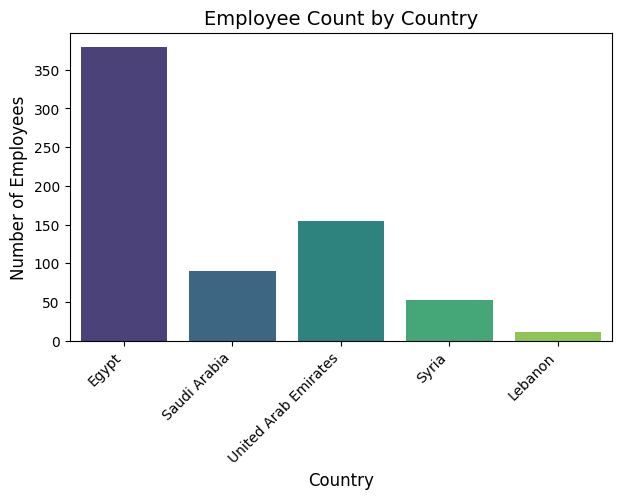

In [ ]:
# For Plotting the figure
plt.figure(figsize=(7, 4))

# Create count plot and specify the colour
sns.countplot(data=df, x="Country", palette="viridis")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Add title and labels
plt.title("Employee Count by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)

# For Display the plot
plt.show()


 **Chart Usage**

A Count Plot is ideal for visualizing the number of employees in each country in diffrent locations in a simple and clear way.

 **Insight**

*   Identifies countries with the highest and lowest employee counts, helping in resource allocation and expansion planning.

*   Highlights workforce imbalance—some countries might have significantly more employees than others.
---




## 2.*Monthly Salary By Performance Rating*

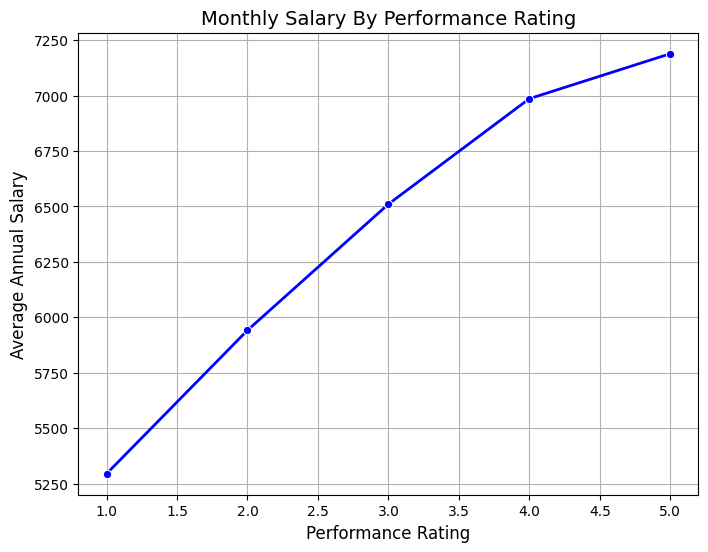

In [ ]:
# Group data by Performance Rating and calculate average salary
performance_salary = df.groupby("Performance")["Monthly_Salary"].mean().reset_index()

# Create the line chart
plt.figure(figsize=(8, 6))
sns.lineplot(data=performance_salary, x="Performance", y="Monthly_Salary", marker="o", linewidth=2, color="blue")


plt.title("Monthly Salary By Performance Rating", fontsize=14)
plt.xlabel("Performance Rating", fontsize=12)
plt.ylabel("Average Annual Salary", fontsize=12)
plt.grid(True)
plt.show()


**Chart Usage**

A Line Chart is ideal for visualizing trends and relationships between performance ratings and salary levels.

**Insights:**

If the line shows an upward trend, it suggests that higher-performing employees earn higher salaries, indicating a fair performance-based pay system.


---



## *3. Remote Work Distribution*

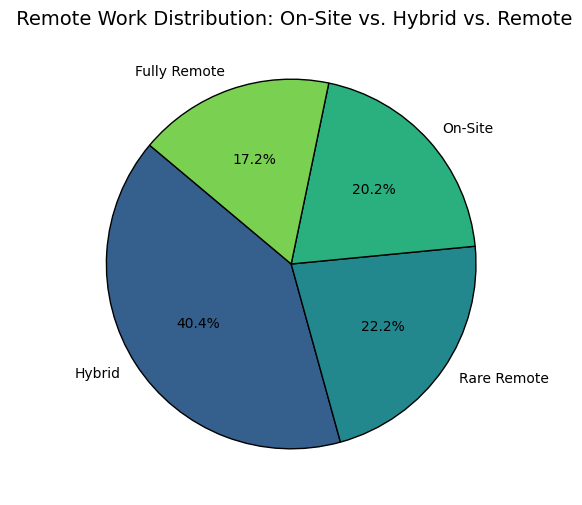

In [ ]:
# Categorize Remote Work Frequency
def categorize_remote_work(days):
    if days == 0:
        return "On-Site"
    elif 1 <= days <= 49:
        return "Rare Remote"
    elif 50 <= days <= 99:
        return "Hybrid"
    else:
        return "Fully Remote"

# Apply function to create a new category column
df["Work_Category"] = df["Remote_Work_Days"].apply(categorize_remote_work)

# Count occurrences of each category
work_distribution = df["Work_Category"].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.8, len(work_distribution)))

plt.pie(work_distribution, labels=work_distribution.index, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title(" Remote Work Distribution: On-Site vs. Hybrid vs. Remote", fontsize=14)
plt.show()


**Chart Usage**

A Pie Chart is useful for visualizing the proportion of employees in different remote work categories (On-Site, Rare Remote, Hybrid, Fully Remote).It provides a quick and clear representation

**Insight:**

*  High Fully Remote → Optimize office space & improve virtual collaboration.
* On-Site → Consider flexible work options for better satisfaction.
* Hybrid → Well-balanced flexible work policy.
* Rare Remote → Limited WFH options room for improvement.


---




## 4. *Employee Gender Distribution By Department*

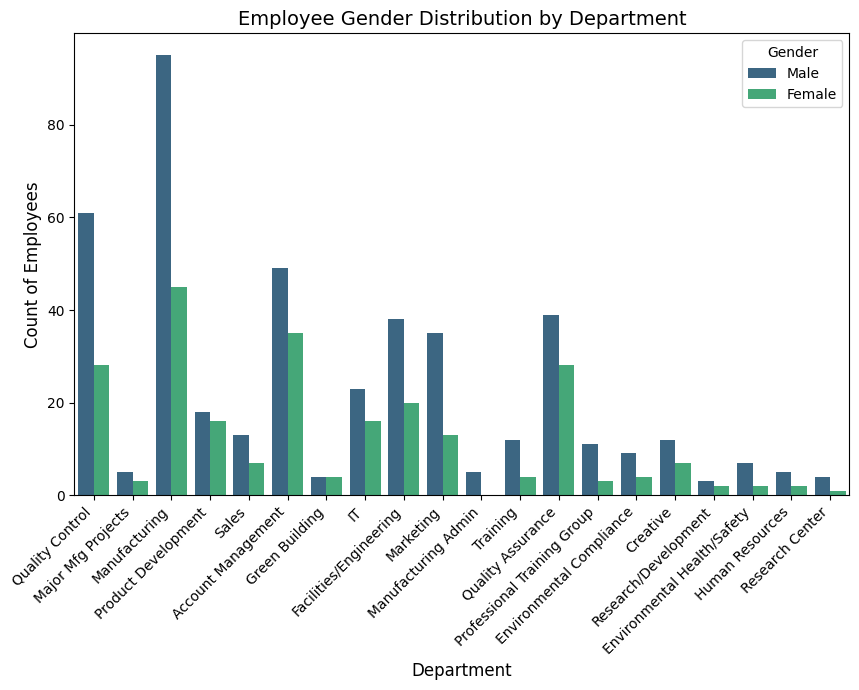

In [ ]:

plt.figure(figsize=(10, 6))

# Count plot for Gender distribution across departments
sns.countplot(data=df, x="Department", hue="Gender", palette="viridis")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")


plt.title("Employee Gender Distribution by Department", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count of Employees", fontsize=12)
plt.show()


**Chart Usage**

Helps identify gender diversity across various departments.

**Insights:**

Identifies gender imbalances in different departments some departments may have more male employees, while others may have a higher concentration of female employees.


---



## 5. *Centre Wise Employee Distribution*

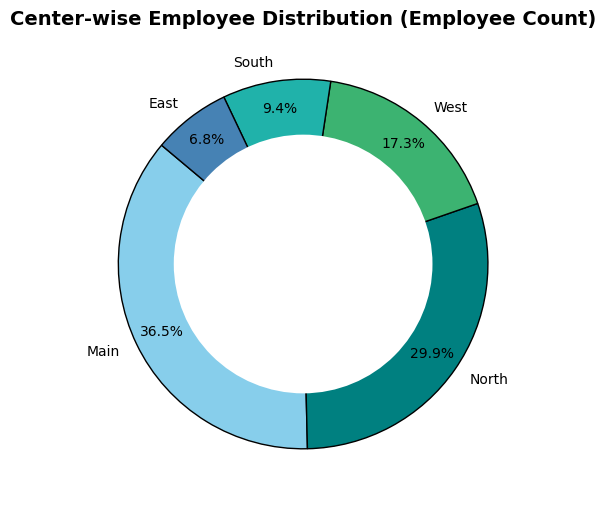

In [ ]:
# Count employees per center
center_distribution = df["Center"].value_counts()

# Plot Donut Chart
plt.figure(figsize=(8, 6))
colors = ["skyblue", "teal", "mediumseagreen", "lightseagreen", "steelblue", "orange"]
plt.pie(center_distribution, labels=center_distribution.index, autopct="%1.1f%%",
        colors=colors, startangle=140, wedgeprops={"edgecolor": "black"}, pctdistance=0.85)

# Add center circle for donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Center-wise Employee Distribution (Employee Count)", fontsize=14, fontweight="bold")
plt.show()

**Chart Usage**

A **Donut Chart** is effective for visualizing the proportion of employees across different centers.

**Insights:**

*   Identifies the largest and smallest employee centers, helping in strategic workforce planning.

*  Centers with a very small workforce may indicate understaffing or the need for expansion.
---



## 6. *Country Wise Sick Leave And Unpaid Leaves*  

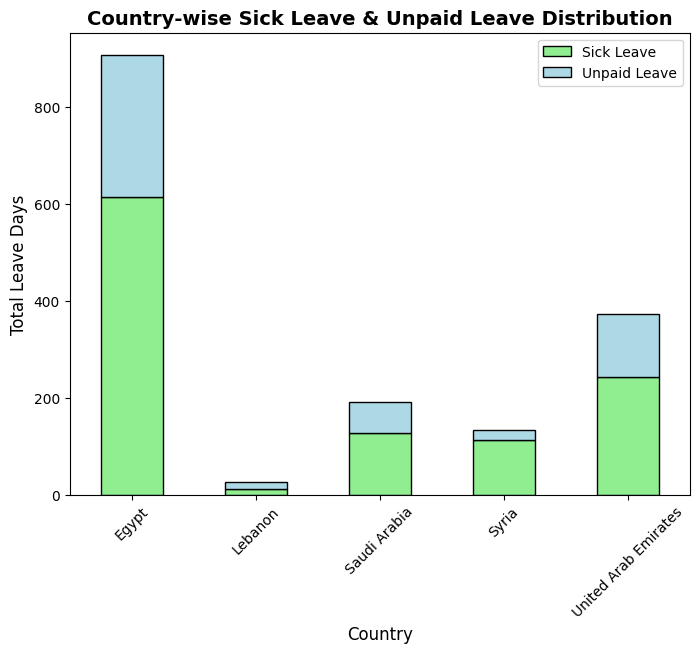

In [ ]:


# Group by Department and sum Sick Leave & Unpaid Leave
leave_data = df.groupby("Country")[["Sick_Leaves", "Unpaid_Leaves"]].sum()

# Plot Stacked Bar Chart
leave_data.plot(kind="bar", stacked=True, figsize=(8, 6), color=["lightgreen", "lightblue"], edgecolor="black")

plt.title("Country-wise Sick Leave & Unpaid Leave Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Leave Days", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Sick Leave", "Unpaid Leave"])

plt.show()


 **Chart Usage**

A **Stacked Bar Chart** is ideal for comparing the total number of Sick Leaves and Unpaid Leaves across different countries.

**Insights:**

*   Identifies which countries have the highest and lowest leave usage, helping HR track employee absenteeism and plan better leave policies.

*   A high number of unpaid leaves may indicate salary issues, job dissatisfaction, or personal financial struggles.

*  A high number of sick leaves in certain countries could suggest health concerns, poor work conditions, or seasonal illnesses affecting employees







---



## *7. Employee Count By Satisfaction Score And Annual Salary*

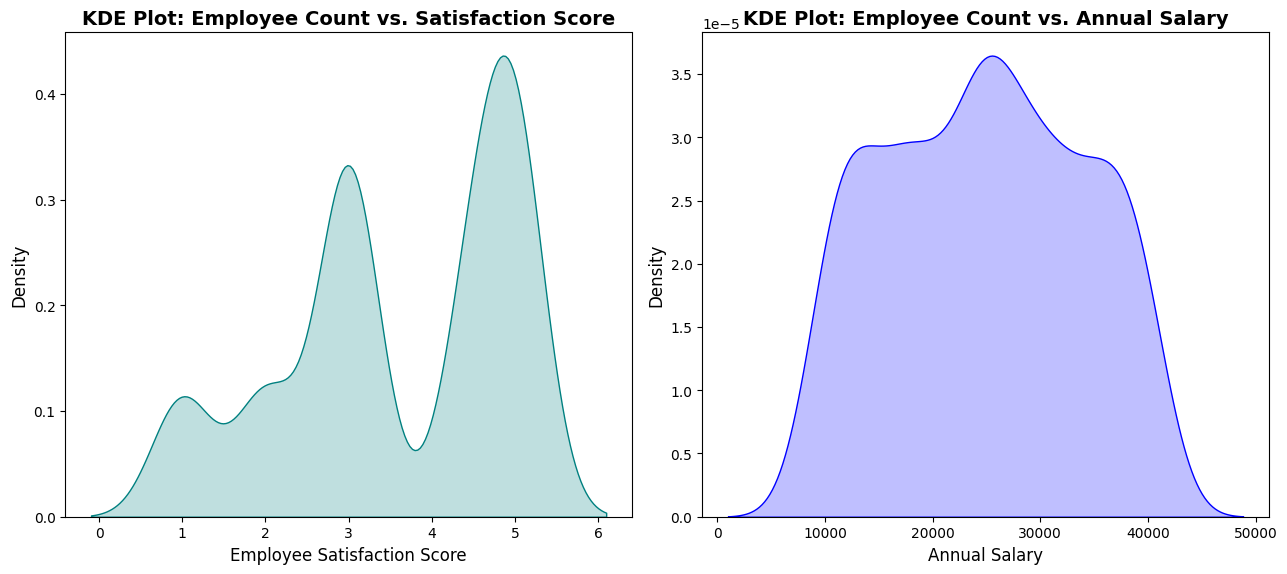

In [ ]:

# Convert necessary columns to numeric
df["Annual_Salary"] = pd.to_numeric(df["Annual_Salary"], errors="coerce")
df["Employee_Satisfaction_Score"] = pd.to_numeric(df["Employee_Satisfaction_Score"], errors="coerce")

# Drop NaN values
df = df.dropna(subset=["Annual_Salary", "Employee_Satisfaction_Score"])

# Set figure size for side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(13,6))

# KDE Plot: Employee Count vs. Employee Satisfaction Score
sns.kdeplot(df["Employee_Satisfaction_Score"], fill='True',color="teal", ax=axes[0])
axes[0].set_title("KDE Plot: Employee Count vs. Satisfaction Score", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Employee Satisfaction Score", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)

# KDE Plot: Employee Count vs. Annual Salary
sns.kdeplot(df["Annual_Salary"], fill='True',color="blue", ax=axes[1])
axes[1].set_title("KDE Plot: Employee Count vs. Annual Salary", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Annual Salary", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Chart Usage**

* A **KDE (Kernel Density Estimation)** Plot is ideal for understanding the distribution of Employee Satisfaction Scores and Annual Salaries.
* Useful for HR and management to analyze salary patterns and overall employee morale.

**Insights:**
*  Comparing the two charts → Helps assess whether higher salaries correlate with higher satisfaction, providing insights for compensation and employee retention strategies.

*  HR can use this data to identify salary gaps, improve pay structures, and enhance employee engagement initiatives.
---





## 8. *Overtime By Remote Work Days*

<ipython-input-26-74fce67f7c5e>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_overtime = df.groupby("Remote_Work_Group", as_index=False)["Over_Time"].mean()


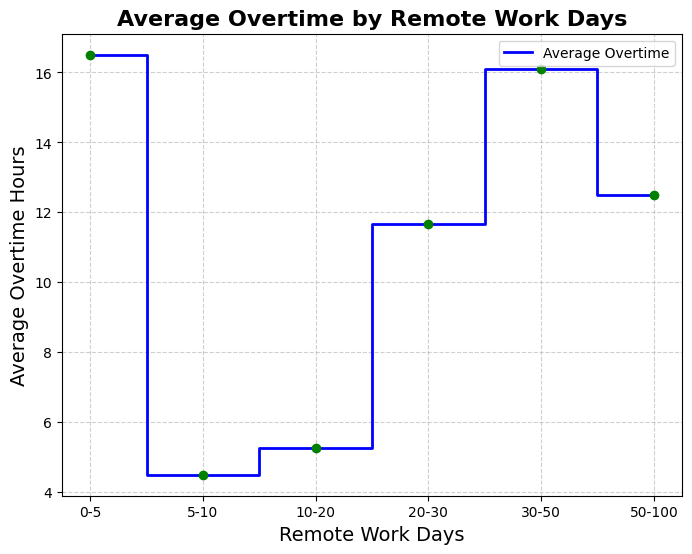

In [ ]:

# Convert Remote_Work_Days to numeric
df["Remote_Work_Days"] = pd.to_numeric(df["Remote_Work_Days"], errors="coerce").astype("Int64")

# Drop any NaN values after conversion
df = df.dropna(subset=["Remote_Work_Days", "Over_Time"])

# Define bins for grouping Remote_Work_Days
bins = [0, 5, 10, 20, 30, 50, 100]  # Example bins: 0-5, 5-10, 10-20, etc.
labels = ["0-5", "5-10", "10-20", "20-30", "30-50", "50-100"]

# Categorize Remote_Work_Days into groups
df["Remote_Work_Group"] = pd.cut(df["Remote_Work_Days"], bins=bins, labels=labels, include_lowest=True)

# Calculate the average overtime for each Remote Work Frequency group
avg_overtime = df.groupby("Remote_Work_Group", as_index=False)["Over_Time"].mean()

# Set figure size
plt.figure(figsize=(8, 6))

# Step Plot using Matplotlib
plt.step(avg_overtime["Remote_Work_Group"], avg_overtime["Over_Time"], color="blue", where="mid", linewidth=2, label="Average Overtime")

# Add markers for visibility
plt.scatter(avg_overtime["Remote_Work_Group"], avg_overtime["Over_Time"], color="green", zorder=3)

# Add labels and title
plt.title("Average Overtime by Remote Work Days", fontsize=16, fontweight="bold")
plt.xlabel("Remote Work Days", fontsize=14)
plt.ylabel("Average Overtime Hours", fontsize=14)

# Show legend
plt.legend()

# Show the plot
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



 **Chart Usage**

A Step Plot is ideal for visualizing how average overtime hours change with different remote work frequency groups.

**Insights:**

* If overtime increases with remote work, it may indicate that employees struggle with workload balance when working remotely.

* If overtime decreases as remote work increases, it suggests that remote employees may have better work efficiency or flexibility.
---



## *Years By Promotion*

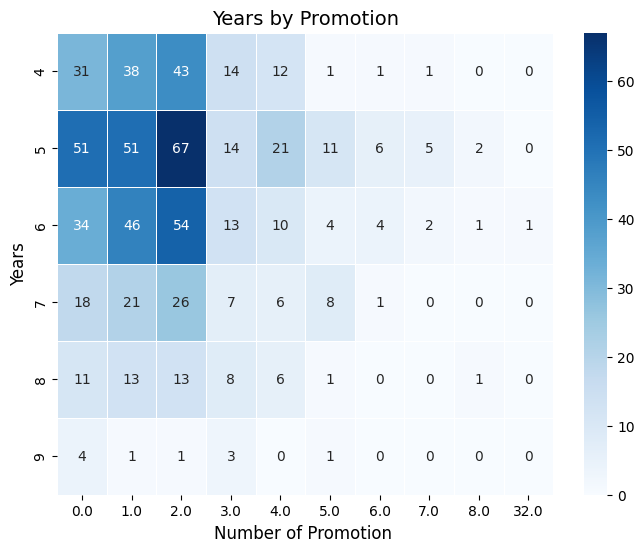

In [ ]:

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index="Years", columns="Promotion", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d", linewidths=0.5)

plt.title("Years by Promotion", fontsize=14)
plt.xlabel("Number of Promotion ", fontsize=12)
plt.ylabel("Years", fontsize=12)

plt.show()


**Usage of Chart**

* A Heatmap It helps identify promotion trends based on employee tenure.
* The darker shades represent higher values, making it easy to spot trends and patterns

**Insights:**

* Clusters of high promotion counts indicate that employees are more likely to be promoted after a certain number of years.

* If promotions are concentrated in lower years, it suggests fast career progression, while promotions at higher years may indicate slower growth or delayed recognition.

* If there are gaps (lighter areas) in the heatmap, it may suggest that some employees are stuck in roles without promotions.


---



# *CONCLUSION*

---


*   Balance workforce distribution by hiring strategically across locations and departments.
*   Optimize remote work policies to ensure flexibility while maintaining productivity.
*  Ensure fair salary structures based on performance, experience, and job role.
*  Encourage career growth by making promotion criteria transparent and skill-based.
* Improve employee well-being by addressing overtime, leave policies, and work stress factors.

This project provided valuable workforce insights by analyzing employee data through various visualizations and statistical analysis. By leveraging Python (Pandas, NumPy, Matplotlib, Seaborn), we identified key trends in workforce distribution, job satisfaction, remote work impact, salary patterns, and promotions to aid HR decision-making and workforce optimization.

